In [50]:
# import necessary extensions
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [51]:
# Warning Prework
import warnings
warnings.filterwarnings('ignore')

# Load Files into project
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Store the Files with new names 
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Convert Files to Data frames
complete_data = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])

In [52]:
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [53]:
# Store the mtv data, by drug and timepoint
tumor_volume_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

#Convert to DataFrame
tumor_volume_mean = pd.DataFrame(tumor_volume_mean)


In [54]:
tumor_volume_mean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [55]:
# Store the SE of TV groupby drug and timepoint
tumor_volume_se = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_volume_se = pd.DataFrame(tumor_volume_se)

In [56]:
#Preview Data
tumor_volume_se.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [57]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_mean = tumor_volume_mean.reset_index()
tumor_vols_pivot_mean = tumor_vols_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_volume_se = tumor_volume_se.reset_index()
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

In [58]:
#Verify Data
tumor_vols_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [59]:
#Verify Data
tumor_vols_pivot_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


No handles with labels found to put in legend.


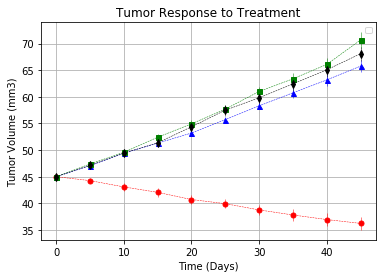

In [77]:
# Capomulin plt
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Capomulin"], yerr=tumor_vols_pivot_sem["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)

# Infubinol plt
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Infubinol"], yerr=tumor_vols_pivot_sem["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)

# Ketapril plt
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Ketapril"], yerr=tumor_vols_pivot_sem["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)

#Placebio plt
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Placebo"], yerr=tumor_vols_pivot_sem["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

#GRAPH info
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)


In [78]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_sites_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to Data & Preview
met_sites_mean = pd.DataFrame(met_sites_mean)

met_sites_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [80]:
#Munging the Data Frames
tumor_vols_mean = tumor_vols_mean.reset_index(drop=True) 
tumor_vols_pivot_mean = tumor_vols_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_vols_sem = tumor_vols_sem.reset_index(drop=True) 
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_vols_pivot_mean.head(5)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [84]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_sem = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
met_sites_sem = pd.DataFrame(met_sites_sem)

# Preview DataFrame
met_sites_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [69]:
# Minor Data Munging to Re-Format the Data Frames
met_sites_mean = met_sites_mean.reset_index()
met_sites_pivot_mean = met_sites_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

met_sites_sem = met_sites_sem.reset_index()
met_sites_pivot_sem = met_sites_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
tumor_vols_pivot_mean.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


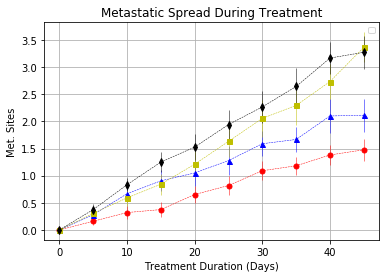

In [91]:
# Capomulin plt
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Capomulin"], yerr=met_sites_pivot_sem["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)

#Infubinol plt
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Infubinol"], yerr=met_sites_pivot_sem["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)

#Ketapril plt
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Ketapril"], yerr=met_sites_pivot_sem["Ketapril"], color="y", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)

#Placebo plt
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Placebo"], yerr=met_sites_pivot_sem["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

#Graph details
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Fig2.png")
plt.show()

In [86]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = clinical_data_complete.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
survival_count = pd.DataFrame({"Mouse Count": survival_count})

# Preview DataFrame
survival_count.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [87]:
# Munging the Data Frames
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
survival_count_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


No handles with labels found to put in legend.


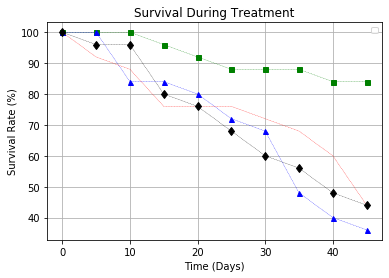

In [89]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * survival_count_pivot["Capomulin"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.30)
plt.plot(100 * survival_count_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.30)
plt.plot(100 * survival_count_pivot["Ketapril"] / 25, "r", linestyle="dashed", markersize=5, linewidth=0.30)
plt.plot(100 * survival_count_pivot["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.30)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Fig3.png")

# Show the Figure
plt.show()

In [75]:
# Calculate the percent changes for each drug
tumor_pct_change =  100 * (tumor_vols_pivot_mean.iloc[-1] - tumor_vols_pivot_mean.iloc[0]) / tumor_vols_pivot_mean.iloc[0]
tumor_pct_change_sem =  100 * (tumor_vols_pivot_sem.iloc[-1] - tumor_vols_pivot_sem.iloc[0]) / tumor_vols_pivot_sem.iloc[0]

# Display the data to confirm
tumor_pct_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

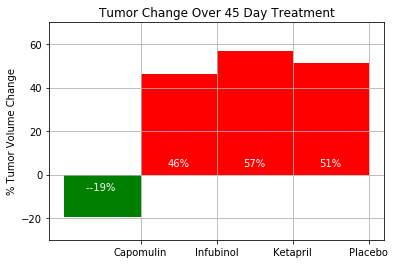

In [92]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change["Capomulin"], 
               tumor_pct_change["Infubinol"], 
               tumor_pct_change["Ketapril"], 
               tumor_pct_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("Fig4.png")

# Show the Figure
fig.show()